In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

#for vizualisation purposes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
dataset = pd.read_csv('vaihingen_train_without_ground.csv')

In [3]:
dataset

,X,Y,Z,Intensity,return_number,number_of_returns,label
0,496848.91,5419403.58,265.46,19,1,1,1
1,496848.92,5419403.97,265.43,24,1,1,1
2,496848.93,5419404.35,265.40,31,1,1,1
3,496848.94,5419404.73,265.36,33,1,1,1
4,496849.34,5419405.72,265.30,44,1,1,1
...,...,...,...,...,...,...,...
506842,497067.61,5419442.02,260.30,255,1,1,6
506843,497067.62,5419442.47,260.28,243,1,1,7
506844,497067.64,5419442.89,260.03,237,1,1,7
506845,497067.65,5419443.29,259.84,113,1,1,7


In [4]:
dataset.label.unique()

array([1, 8, 7, 2, 5, 6, 3, 4, 0], dtype=int64)

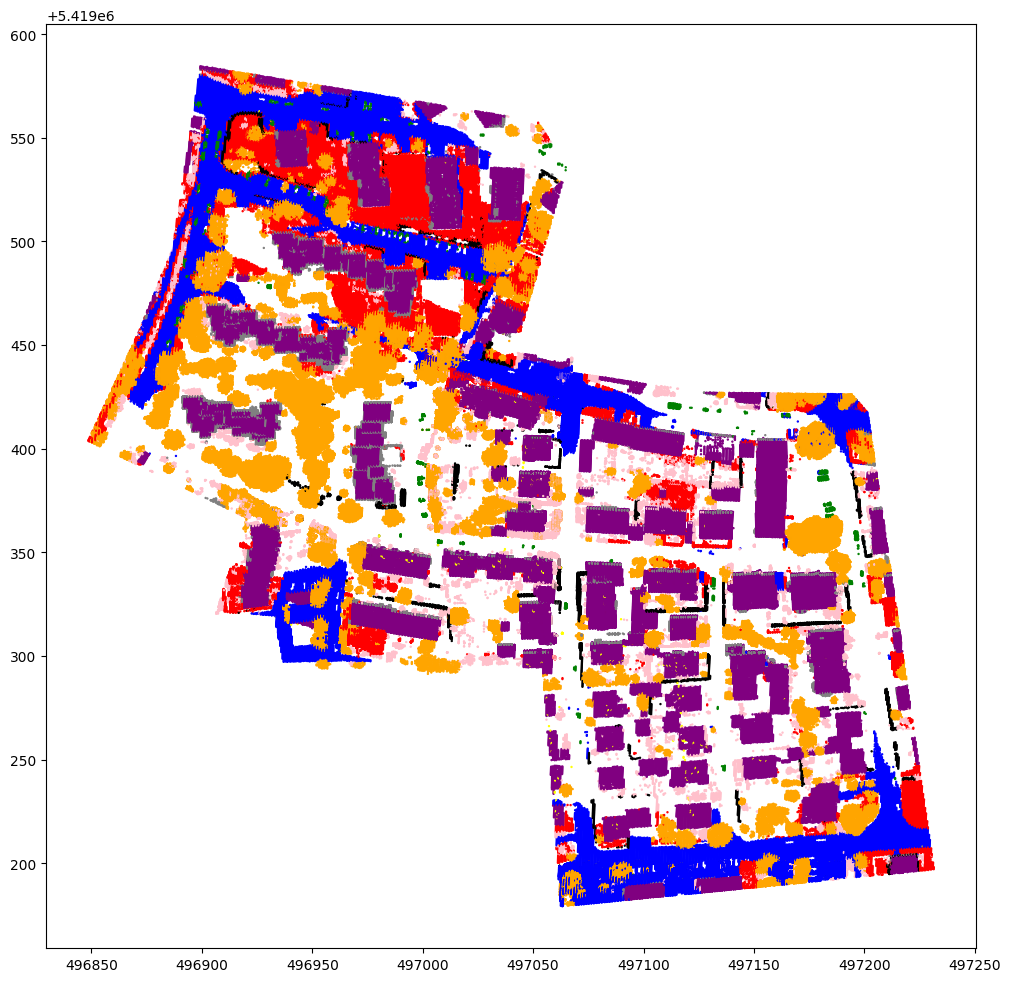

In [5]:
colors = {0:'yellow',1:'red',2:'blue',3:'green',4:'black',5:'purple',6:'gray',7:'pink',8:'orange'}
plt.figure(figsize=(12,12))
plt.scatter(dataset['X'],dataset['Y'],c=dataset['label'].map(colors),s=0.5)
plt.show()

In [6]:
X = dataset.iloc[:,0:4].values

In [7]:
X

array([[4.96848910e+05, 5.41940358e+06, 2.65460000e+02, 1.90000000e+01],
       [4.96848920e+05, 5.41940397e+06, 2.65430000e+02, 2.40000000e+01],
       [4.96848930e+05, 5.41940435e+06, 2.65400000e+02, 3.10000000e+01],
       ...,
       [4.97067640e+05, 5.41944289e+06, 2.60030000e+02, 2.37000000e+02],
       [4.97067650e+05, 5.41944329e+06, 2.59840000e+02, 1.13000000e+02],
       [4.97067670e+05, 5.41944376e+06, 2.59880000e+02, 1.23000000e+02]])

In [8]:
y = dataset.iloc[:,-1].values

In [9]:
y


array([1, 1, 1, ..., 7, 7, 7], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)

(405477, 4)
(101370, 4)


In [12]:
X_train = X_train.reshape(X_train.shape[0], 4,1)

X_test = X_test.reshape(X_test.shape[0], 4,1)

print(X_train.shape)
print(X_test.shape)

(405477, 4, 1)
(101370, 4, 1)


In [13]:
print(y_train.shape)
print(y_test.shape)

(405477,)
(101370,)


In [14]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,BatchNormalization

In [15]:
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv1D(filters=30,kernel_size=3,strides=1,padding='causal',activation='relu',input_shape=(4,1)),
#    tf.keras.layers.Dense(64,activation='relu'),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(9,activation='softmax')
#])

In [16]:
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=(2,),padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01),input_shape=(4,1)))
model.add(Conv1D(filters=64,kernel_size=(2,),padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Conv1D(filters=128,kernel_size=(2,),padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(MaxPooling1D(pool_size=(2,),strides=1, padding='same'))
#model.add(Dropout(0.2))
model.add(Flatten())
#model.add(MaxPooling1D(pool_size=2))
#model.add(BatchNormalization())
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(512,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(9,activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 32)             96        
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 64)             4160      
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            16512     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                        

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1)

12672/12672 [==============================] - 124s 10ms/step - loss: 223.7441 - accuracy: 0.2549 - val_loss: 1.9884 - val_accuracy: 0.3217


In [20]:
y_pred = model.predict(X_test)

3168/3168 [==============================] - 18s 6ms/step


In [21]:
y_pred

array([[2.9721226e-05, 1.4040887e-02, 1.6125438e-01, ..., 9.1941684e-02,
        3.9587095e-02, 2.0695996e-01],
       [3.0203179e-05, 1.3925710e-02, 1.5939076e-01, ..., 9.4620526e-02,
        4.1854553e-02, 2.0706795e-01],
       [2.8771497e-05, 1.4250609e-02, 1.6557194e-01, ..., 8.6402372e-02,
        3.4901194e-02, 2.0630930e-01],
       ...,
       [3.0036894e-05, 1.3957662e-02, 1.5989792e-01, ..., 9.3847223e-02,
        4.1174356e-02, 2.0711915e-01],
       [3.0105552e-05, 1.3943959e-02, 1.5967758e-01, ..., 9.4214000e-02,
        4.1476801e-02, 2.0711796e-01],
       [2.9987370e-05, 1.3972973e-02, 1.6006847e-01, ..., 9.3589619e-02,
        4.0943712e-02, 2.0711869e-01]], dtype=float32)

In [22]:
y_pred = np.argmax(y_pred,axis=-1)

In [23]:
y_pred

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,y_pred))

[[    0     0     0     0     0   133     0     0     0]
 [    0     0     0     0     0  9392     0     0     0]
 [    0     0     0     0     0 18151     0     0     0]
 [    0     0     0     0     0   486     0     0     0]
 [    0     0     0     0     0  1587     0     0     0]
 [    0     0     0     0     0 32610     0     0     0]
 [    0     0     0     0     0  4853     0     0     0]
 [    0     0     0     0     0  6094     0     0     0]
 [    0     0     0     0     0 28064     0     0     0]]


In [26]:
print(classification_report(y_test,y_pred))

C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00      9392
           2       0.00      0.00      0.00     18151
           3       0.00      0.00      0.00       486
           4       0.00      0.00      0.00      1587
           5       0.32      1.00      0.49     32610
           6       0.00      0.00      0.00      4853
           7       0.00      0.00      0.00      6094
           8       0.00      0.00      0.00     28064

    accuracy                           0.32    101370
   macro avg       0.04      0.11      0.05    101370
weighted avg       0.10      0.32      0.16    101370



C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


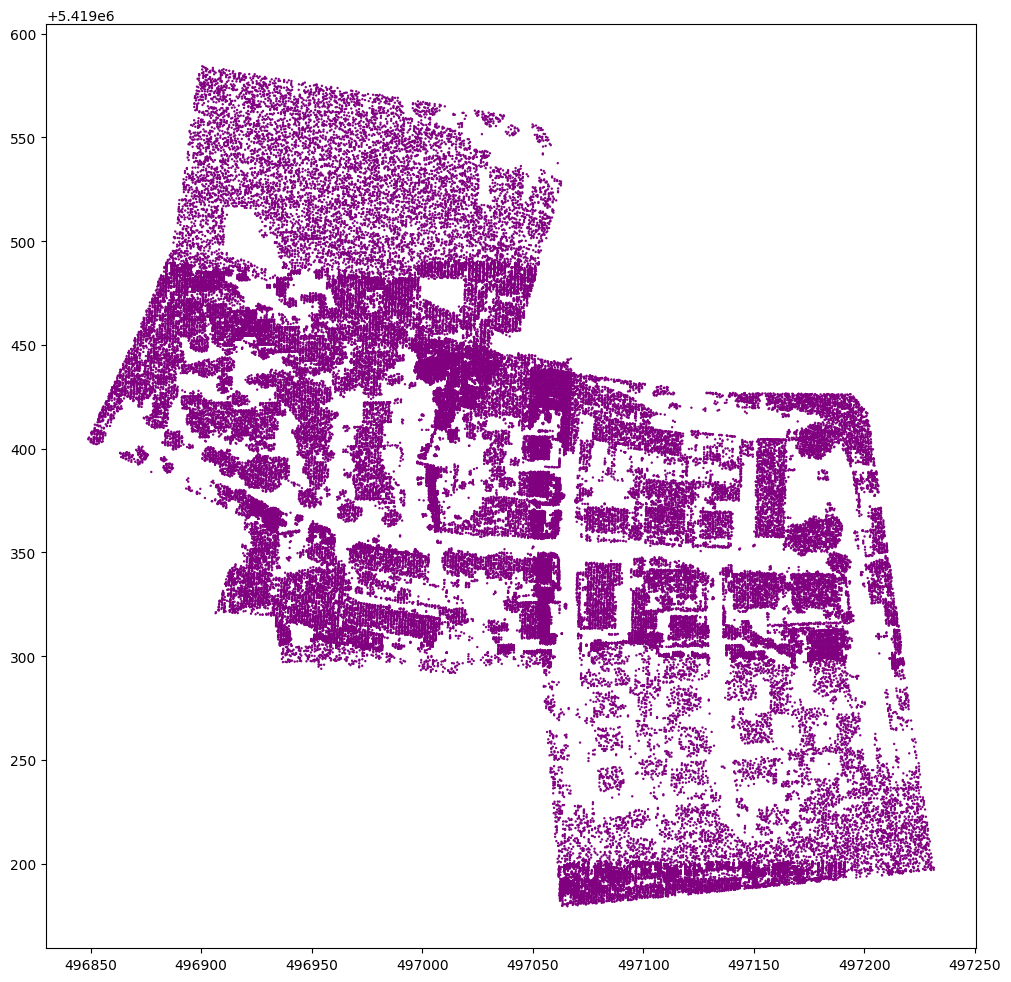

In [27]:
colors = {0:'yellow',1:'red',2:'blue',3:'green',4:'black',5:'purple',6:'gray',7:'pink',8:'orange'}
plt.figure(figsize=(12,12))
plt.scatter(X_test[:,0],X_test[:,1],c=pd.Series(y_pred).map(colors),s=0.5)
plt.show()